In [ ]:
#importing the libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix



In [ ]:
data=pd.read_csv('/content/tested.csv')
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [ ]:
# now we will Explore the data

data.info()




<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Survived     418 non-null    int64  
 2   Pclass       418 non-null    int64  
 3   Name         418 non-null    object 
 4   Sex          418 non-null    object 
 5   Age          332 non-null    float64
 6   SibSp        418 non-null    int64  
 7   Parch        418 non-null    int64  
 8   Ticket       418 non-null    object 
 9   Fare         417 non-null    float64
 10  Cabin        91 non-null     object 
 11  Embarked     418 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 39.3+ KB


In [ ]:
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,0.363636,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.481622,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,0.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,0.000000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,0.000000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,1.000000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,1.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [ ]:
data=data.drop(columns=['Name','PassengerId','Ticket','Cabin'])

In [ ]:
#handling missing values
data.isna().sum()

Survived     0
Pclass       0
Sex          0
Age         86
SibSp        0
Parch        0
Fare         1
Embarked     0
dtype: int64

In [ ]:
# Handle missing values
data['Age'].fillna(data['Age'].mean(), inplace=True)

In [ ]:
data.dropna(inplace=True)

In [ ]:
data.isna().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

In [ ]:
data

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,34.50000,0,0,7.8292,1
1,1,3,0,47.00000,1,0,7.0000,2
2,0,2,1,62.00000,0,0,9.6875,1
3,0,3,1,27.00000,0,0,8.6625,2
4,1,3,0,22.00000,1,1,12.2875,2
...,...,...,...,...,...,...,...,...
413,0,3,1,30.27259,0,0,8.0500,2
414,1,1,0,39.00000,0,0,108.9000,0
415,0,3,1,38.50000,0,0,7.2500,2
416,0,3,1,30.27259,0,0,8.0500,2


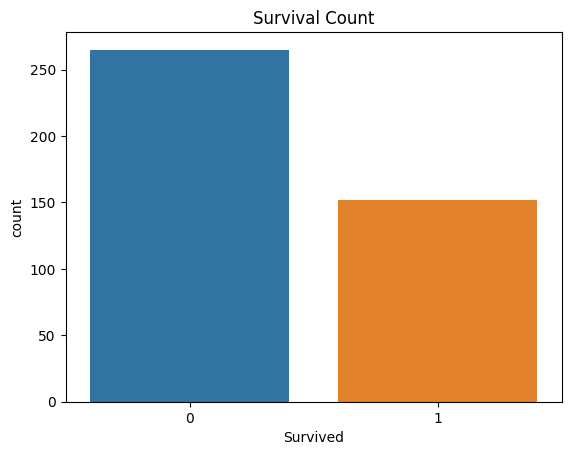

In [ ]:
# Let's visualize the distribution of the target variable 'Survived'
sns.countplot(x='Survived', data=data)
plt.title('Survival Count')
plt.show()

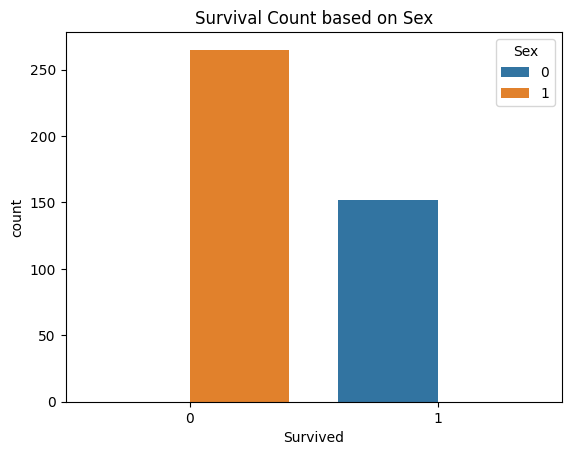

In [ ]:
#lets Visualize the survival count based on the 'Sex' feature
sns.countplot(x='Survived', hue='Sex', data=data)
plt.title('Survival Count based on Sex')
plt.show()

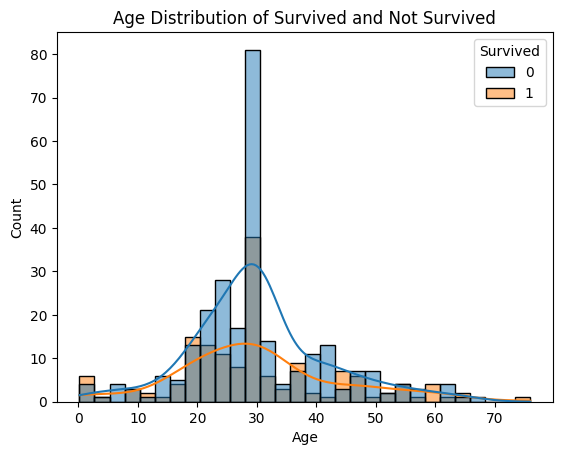

In [ ]:
# Visualize the age distribution of passengers who survived and didn't survive
sns.histplot(data=data, x='Age', hue='Survived', bins=30, kde=True)
plt.title('Age Distribution of Survived and Not Survived')
plt.show()

In [ ]:
#now we will change  categorical features in numeric values using encoding
label_encoder = LabelEncoder()
data['Sex'] = label_encoder.fit_transform(data['Sex'])
data['Embarked'] = label_encoder.fit_transform(data['Embarked'])



In [ ]:
# Split the data into features (X) and labels (y)
X = data.drop(columns=['Survived'])
y=data['Survived']


In [ ]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=3)

In [ ]:
def mymodel(model):

  model.fit(X_train,y_train)
  ypred=model.predict(X_test)
  print("Accuracy Score:",accuracy_score(y_test,ypred))
  print("Classification report:\n",classification_report(y_test,ypred))
  print("Training accuracy: ",model.score(X_train,y_train))
  print("Testing accuracy: ",model.score(X_test,y_test))
  return(model)

In [ ]:
knn=KNeighborsClassifier()
mymodel(knn)

Accuracy Score: 0.6666666666666666
Classification report:
               precision    recall  f1-score   support

           0       0.74      0.77      0.75        56
           1       0.50      0.46      0.48        28

    accuracy                           0.67        84
   macro avg       0.62      0.62      0.62        84
weighted avg       0.66      0.67      0.66        84

Training accuracy:  0.7987987987987988
Testing accuracy:  0.6666666666666666


KNeighborsClassifier()

In [ ]:
rfc=RandomForestClassifier()
mymodel(rfc)

Accuracy Score: 1.0
Classification report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        56
           1       1.00      1.00      1.00        28

    accuracy                           1.00        84
   macro avg       1.00      1.00      1.00        84
weighted avg       1.00      1.00      1.00        84

Training accuracy:  1.0
Testing accuracy:  1.0


RandomForestClassifier()

In [ ]:
lr=LogisticRegression()
mymodel(lr)

Accuracy Score: 1.0
Classification report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        56
           1       1.00      1.00      1.00        28

    accuracy                           1.00        84
   macro avg       1.00      1.00      1.00        84
weighted avg       1.00      1.00      1.00        84

Training accuracy:  1.0
Testing accuracy:  1.0


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [ ]:
new_passenger_info = {
    'Pclass': 3,
    'Sex': 1,  # 1 for male, 0 for female
    'Age':30,
    'SibSp': 0,
    'Parch':0,
    'Fare':22,
    'Embarked':0,
}#Pclass	Sex	Age	SibSp	Parch	Fare	Embarked

In [ ]:
# Create a DataFrame from the new passenger information
new_passenger_data = pd.DataFrame([new_passenger_info])

# Make the prediction for the new passenger
predict=knn.predict(new_passenger_data)[0]

# Map the binary prediction to 'Survived' or 'Not Survived'
survival_status = "Survived" if predict == 1 else "Not Survived"

print(f"The passenger is predicted to be: {survival_status}")

The passenger is predicted to be: Not Survived
